In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

In [5]:
df = pd.read_csv('./Data.csv')

## RandomForestClassifier:
---

In [6]:
# Deal with null values - I'll use SimpleImputer to fill missing values
# For categorical columns use most frequent strategy
for column in df.select_dtypes(include=['object']).columns:
    imputer = SimpleImputer(strategy='most_frequent')
    df[column] = imputer.fit_transform(df[[column]])

In [7]:
# For numerical columns use mean strategy
for column in df.select_dtypes(include=[np.number]).columns:
    imputer = SimpleImputer(strategy='mean')
    df[column] = imputer.fit_transform(df[[column]])

In [8]:
# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [9]:
# Split into features and target variable
X = df.drop('food_supply_stage', axis=1)
y = df['food_supply_stage']

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create a Random Forest Classifier and fit it to the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Predict on the test data
y_pred = clf.predict(X_test)

In [13]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.86      0.92         7
           2       0.98      0.98      0.98      2531
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.99      0.98      0.98       724
           6       0.93      0.86      0.89        44
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      0.42      0.59        12
          10       0.00      0.00      0.00         2
          11       0.63      0.72      0.67        43
          12       0.81      0.80      0.81        97
          14       0.91      0.96      0.93       502
          15       0.77      0.62      0.69        16
          16       0.97      0.95      0.96       350
          17       0.99      0.99      0.99      1176
          18       0.44    

/Users/triston/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/triston/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/triston/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### EDA:

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set_style('whitegrid')

/Users/triston/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


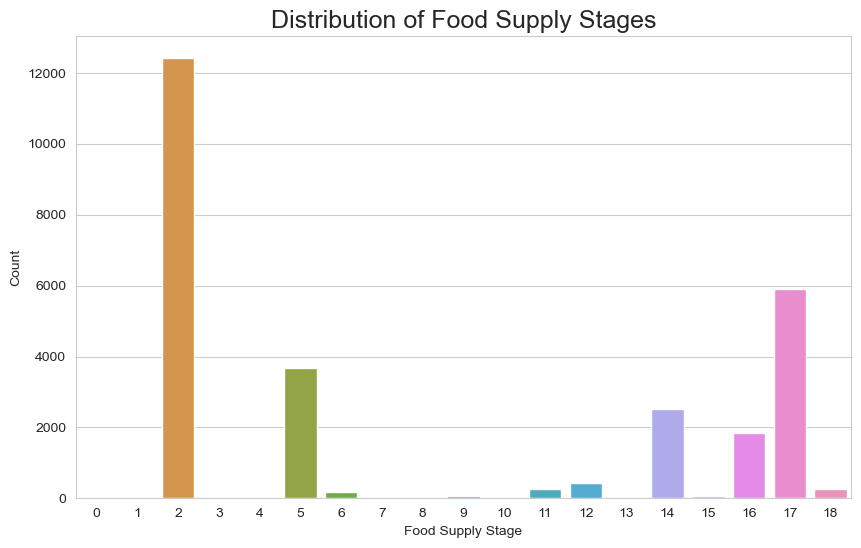

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(y)
plt.title('Distribution of Food Supply Stages', size=18)
plt.xlabel('Food Supply Stage')
plt.ylabel('Count')
plt.show()

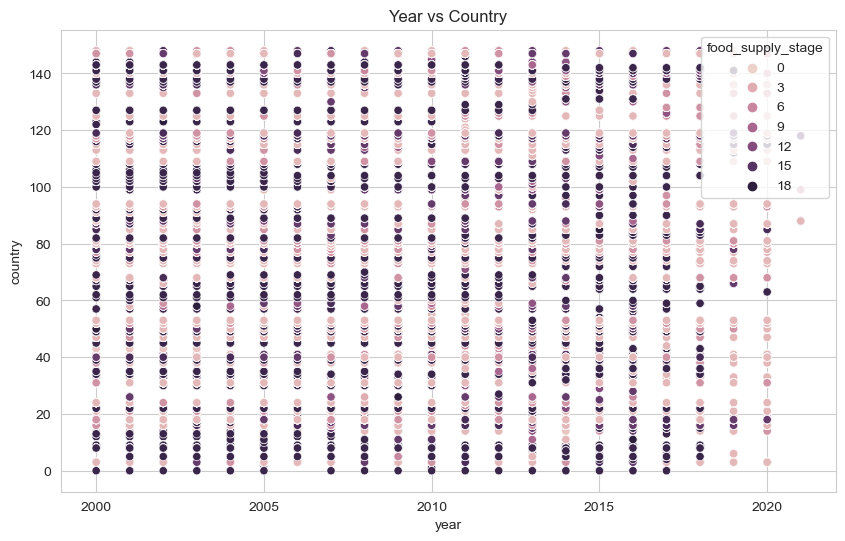

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='country', hue='food_supply_stage')
plt.title('Year vs Country')
plt.show()

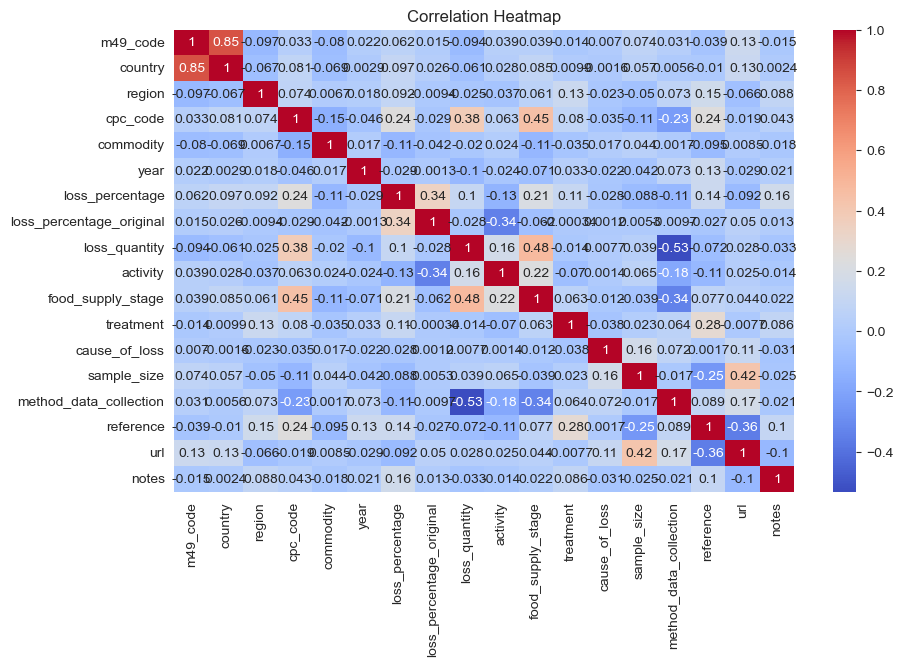

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

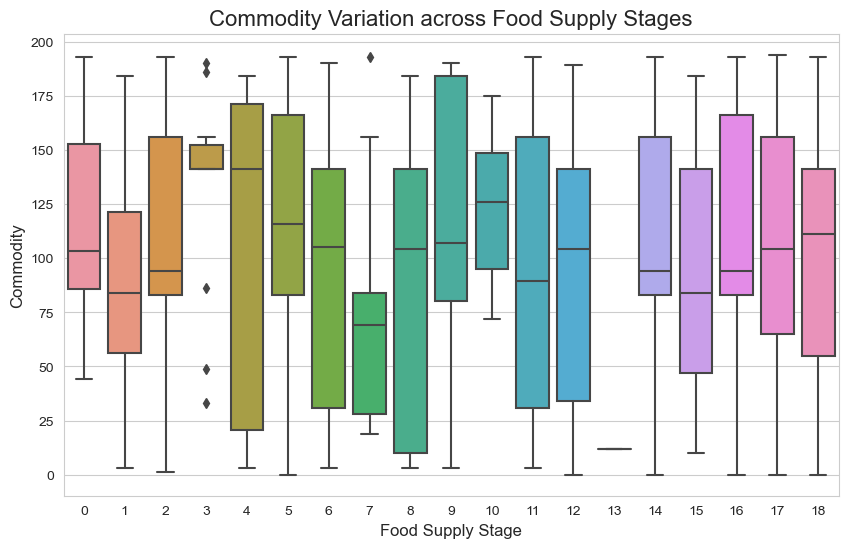

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x='food_supply_stage', y='commodity', data=df)
plt.title('Commodity Variation across Food Supply Stages', size=16)
plt.xlabel('Food Supply Stage', size=12)
plt.ylabel('Commodity', size=12)
plt.show()

In [54]:
df['food_supply_stage'].value_counts()

2     12417
17     5918
5      3688
14     2525
16     1849
12      438
11      262
18      257
6       167
15       76
9        53
1        50
8        17
3        14
10       11
4        11
0        10
7         9
13        1
Name: food_supply_stage, dtype: int64

In [57]:
df['cause_of_loss'].value_counts(ascending=False)

205    26935
110       54
338       41
164       36
40        26
       ...  
285        1
168        1
305        1
325        1
117        1
Name: cause_of_loss, Length: 357, dtype: int64

In [55]:
df.shape

(27773, 18)

In [62]:
df.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104.0,86,31,80,69,2009.0,5.22,2483,2504,103,17,29,205,124,4,90,63,0
1,104.0,86,31,80,69,2008.0,5.43,2510,2451,103,17,29,205,124,4,90,63,0
2,104.0,86,31,80,69,2007.0,5.61,2539,2357,103,17,29,205,124,4,90,63,0
3,104.0,86,31,80,69,2006.0,5.40,2508,2225,103,17,29,205,124,4,90,63,0
4,104.0,86,31,80,69,2005.0,5.00,2425,2142,103,17,29,205,124,4,90,63,0


In [70]:
df['country'].value_counts(ascending=True)

27        1
1         1
10        1
98        1
2         1
       ... 
136     787
68      883
41      885
58     1178
141    1527
Name: country, Length: 149, dtype: int64

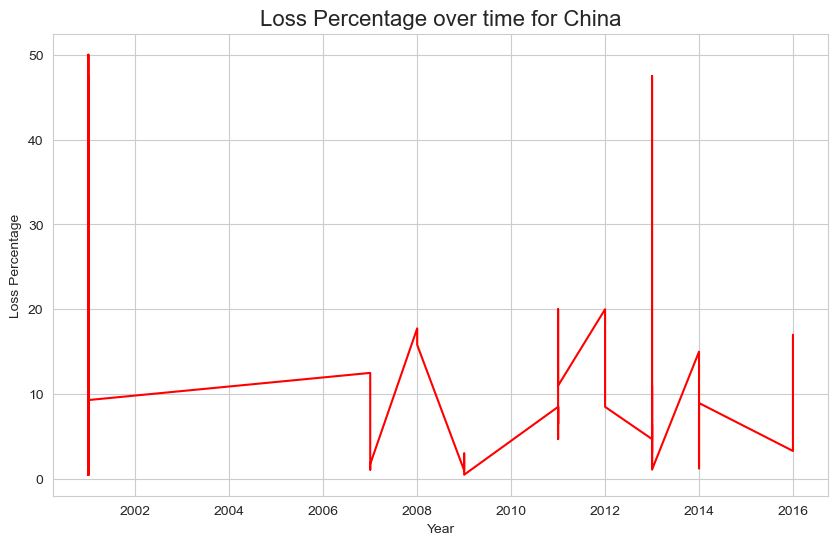

In [75]:
# Select only rows where 'country' is '86'
country_86 = df[df['m49_code'] == 156]

# Sort these rows by year
country_86 = country_86.sort_values(by='year')

# Plot 'loss_percentage' over 'year'
plt.figure(figsize=(10,6))
plt.plot(country_86['year'], country_86['loss_percentage'], c='Red')
plt.xlabel('Year')
plt.ylabel('Loss Percentage')
plt.title('Loss Percentage over time for China', size=16)
plt.show()

### Summary:
---

- Overall Accuracy: The overall accuracy of the model is 96%, which means that the model is able to correctly classify the food supply stage 96% of the time across all classes. This is a high accuracy rate, suggesting that the model is generally very effective at predicting the food supply stage.

- F1-Score: The F1-score is a balanced measure of precision and recall. It's particularly useful in situations where you care about both false positives and false negatives. Most of the F1-scores for the individual classes are quite high, often close to or at 1.00. This indicates that for most classes, the model is doing an excellent job of correctly identifying instances of the class (high precision) and also not missing instances of the class (high recall). The weighted average of the F1-score, which takes into account the number of instances of each class, is 0.96, indicating excellent overall performance.

The overall high accuaracy and F1-scores suggest that this model would be very useful for predicting the food supply stage in most situations. To further improve this model, future work could investigate strategies for dealing with the classes where current performance is poor.

## RandomForestRegressor:
---

In [22]:
df_reg = pd.read_csv('./Data.csv')

In [23]:
# Deal with null values - I'll use SimpleImputer to fill missing values
# For categorical columns use most frequent strategy
for column in df_reg.select_dtypes(include=['object']).columns:
    imputer = SimpleImputer(strategy='most_frequent')
    df_reg[column] = imputer.fit_transform(df_reg[[column]])

In [24]:
# For numerical columns use mean strategy
for column in df_reg.select_dtypes(include=[np.number]).columns:
    imputer = SimpleImputer(strategy='mean')
    df_reg[column] = imputer.fit_transform(df_reg[[column]])

In [25]:
# Encode categorical features
label_encoders_reg = {}
for column in df_reg.select_dtypes(include=['object']).columns:
    label_encoders_reg[column] = LabelEncoder()
    df_reg[column] = label_encoders_reg[column].fit_transform(df_reg[column])

In [26]:
# Split into features and target variable
X_reg = df_reg.drop('loss_percentage', axis=1)
y_reg = df_reg['loss_percentage']

In [27]:
# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [28]:
# Create a Random Forest Regressor and fit it to the training data
regr = RandomForestRegressor(n_estimators=100, random_state=42)
regr.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [29]:
# Predict on the test data
y_pred_reg = regr.predict(X_test_reg)

In [30]:
# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reg, y_pred_reg)}")
print(f"R^2 Score: {r2_score(y_test_reg, y_pred_reg)}")

Mean Squared Error: 1.456968605789579
Mean Absolute Error: 0.14629128008628342
R^2 Score: 0.9580672048696505


### Summary:
---

- Mean Squared Error (MSE): The MSE is 1.456, which indicates the average squared difference between the estimated values and the actual value. MSE is a risk metric corresponding to the expected value of the squared error loss. The smaller the MSE, the better the forecast is. In this case, the MSE is quite low, indicating that the model's predictions are reasonably close to the actual values.

- Mean Absolute Error (MAE): The MAE is 0.146, which measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. Again, lower values are better. The relatively low MAE in this case indicates that the model has a low average prediction error.

- R-squared (R^2): The R^2 score is 0.958, which is quite high. This metric provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. An R^2 of 100% indicates that all changes in the dependent variable are completely explained by changes in the independent variable(s). An R^2 of 95.8% in this context suggests that 95.8% of the variability in the 'loss_percentage' can be explained by the features in our model. This is an excellent score, implying that our model explains most of the variability in the data, and thus should have strong predictive power.

In summary, the model appears to perform very well in predicting the 'loss_percentage'. The low MSE and MAE values suggest that the model's predictions are quite close to the actual values, while the high R^2 score indicates that the model explains a significant proportion of the variance in the 'loss_percentage'.